In [66]:
path = 'https://raw.githubusercontent.com/LunusMax/football-data/refs/heads/main/Chelsea/df_chelsea.csv'

In [67]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [68]:
data = pd.read_csv(path, sep=';')

data.head()

,Player,Minutes,Tkl,TklW,Int,Ball Recoveries,PrgC,PrgP,Sucessful Take_Ons,Succ%
0,Moises Caicedo,3351,114,73,49,229,43,215,29,45.3
1,Enzo Fernandez,2947,65,33,13,156,60,212,26,47.3
2,Declan Rice,2825,53,25,25,156,90,192,14,48.3
3,Bruno Guimarães,3271,83,47,29,188,64,271,34,43.6


In [69]:
player_colors = {
    'Moises Caicedo': (3, 70, 148),      # Chelsea - azul profundo (home kit)
    'Enzo Fernandez': (255, 215, 0),     # Chelsea away - amarelo ouro (camisa 2)
    'Declan Rice': (26, 35, 126),        # Arsenal - azul marinho do third kit
    'Bruno Guimarães': (0, 0, 0)        # Newcastle - preto (faixas do uniforme)
}

In [70]:
# Métricas por 90
data['Tkl/90'] = (data['Tkl'] * 90) / data['Minutes']
data['TklW/90'] = (data['TklW'] * 90) / data['Minutes']
data['Int/90'] = (data['Int'] * 90) / data['Minutes']
data['Ball Recoveries/90'] = (data['Ball Recoveries'] * 90) / data['Minutes']
data['PrgC/90'] = (data['PrgC'] * 90) / data['Minutes']
data['PrgP/90'] = (data['PrgP'] * 90) / data['Minutes']
data['TakeOns/90'] = (data['Sucessful Take_Ons'] * 90) / data['Minutes']

In [71]:
data.head()

,Player,Minutes,Tkl,TklW,Int,Ball Recoveries,PrgC,PrgP,Sucessful Take_Ons,Succ%,Tkl/90,TklW/90,Int/90,Ball Recoveries/90,PrgC/90,PrgP/90,TakeOns/90
0,Moises Caicedo,3351,114,73,49,229,43,215,29,45.3,3.061773,1.960609,1.316025,6.150403,1.154879,5.774396,0.778872
1,Enzo Fernandez,2947,65,33,13,156,60,212,26,47.3,1.985070,1.007805,0.397014,4.764167,1.832372,6.474381,0.794028
2,Declan Rice,2825,53,25,25,156,90,192,14,48.3,1.688496,0.796460,0.796460,4.969912,2.867257,6.116814,0.446018
3,Bruno Guimarães,3271,83,47,29,188,64,271,34,43.6,2.283705,1.293183,0.797921,5.172730,1.760929,7.456435,0.935494


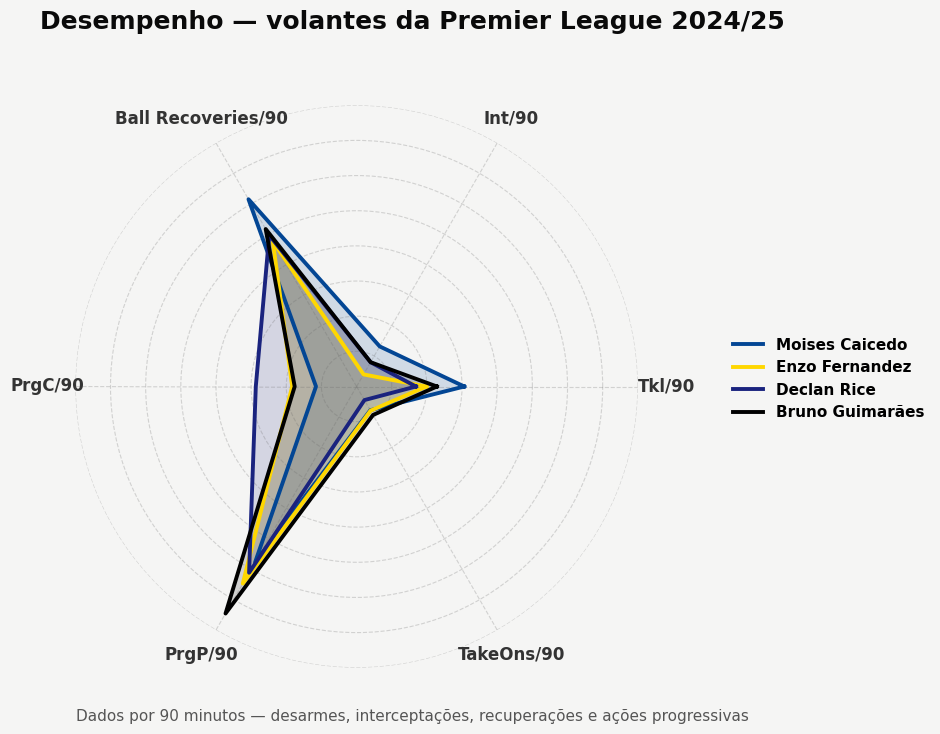

In [72]:
# Cores normalizadas
colors = {k: tuple(np.array(v)/255) for k, v in player_colors.items()}

# Configuração dos eixos
stats = ['Tkl/90','Int/90','Ball Recoveries/90','PrgC/90','PrgP/90','TakeOns/90']
angles = np.linspace(0, 2 * np.pi, len(stats), endpoint=False).tolist()
angles += angles[:1]

# Figura base
fig, ax = plt.subplots(figsize=(7.5, 7.5), subplot_kw=dict(polar=True))
fig.subplots_adjust(top=0.88, bottom=0.10, left=0.05, right=0.80)  # 👈 bloqueia o tight_layout de distorcer o título

# Fundo
fig.patch.set_facecolor('#f5f5f4')
ax.set_facecolor('#f5f5f4')

# Linhas dos jogadores
for _, row in data.iterrows():
    values = [row[s] for s in stats]
    values += values[:1]
    player = row['Player']
    ax.plot(angles, values, linewidth=2.8, label=player, color=colors[player])
    ax.fill(angles, values, alpha=0.15, color=colors[player])

# Estilo dos eixos
ax.set_xticks(angles[:-1])
ax.set_xticklabels(stats, fontsize=12, fontweight='bold', color='#333')
ax.set_yticks(np.arange(0, 9, 1))
ax.set_yticklabels([])
ax.tick_params(axis='x', pad=10)
ax.spines['polar'].set_visible(False)
ax.grid(alpha=0.25, color='#666', linestyle='--')

# Título e subtítulo centralizados
fig.text(0.5, 0.96,
         "Desempenho — volantes da Premier League 2024/25",
         ha='center', va='bottom', fontsize=18, fontweight='bold', color='#0a0a0a')

fig.text(0.5, 0.06,
         "Dados por 90 minutos — desarmes, interceptações, recuperações e ações progressivas",
         ha='center', va='top', fontsize=11, color='#555')

# Legenda fixa (sem afetar o gráfico)
legend = fig.legend(
    loc='center right',
    bbox_to_anchor=(1.20, 0.5),
    fontsize=11,
    frameon=False,
    labelcolor='#000'
)
for text in legend.get_texts():
    text.set_fontweight('bold')

plt.show()

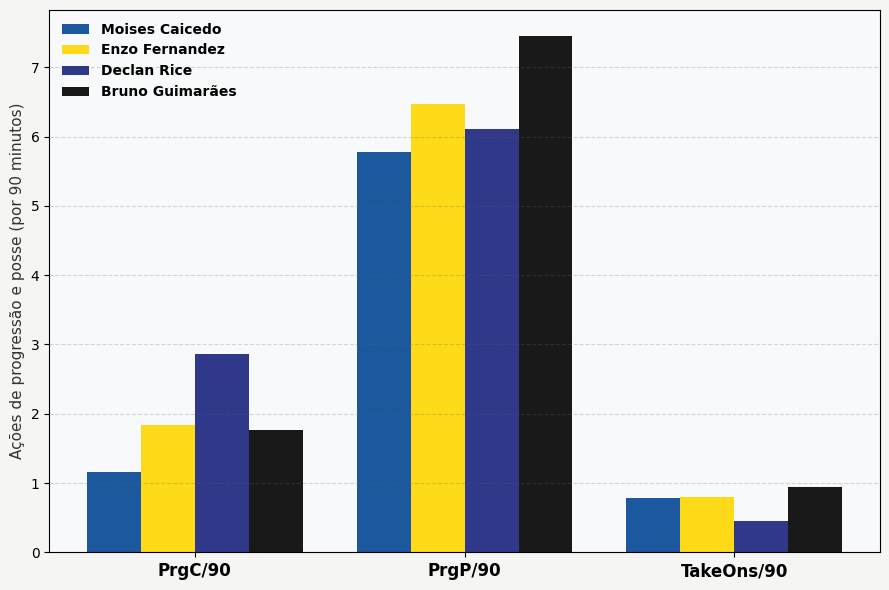

In [73]:
# Métricas ofensivas / de construção
build_cols = ['PrgC/90', 'PrgP/90', 'TakeOns/90']

# Normaliza cores
colors = {k: tuple(np.array(v)/255) for k, v in player_colors.items()}

# Configuração
fig, ax = plt.subplots(figsize=(9, 6))
fig.patch.set_facecolor('#f5f5f4')   # fundo geral (fora do gráfico)
ax.set_facecolor('#f8f9fa')          # fundo da área do gráfico

bar_width = 0.2
x = np.arange(len(build_cols))

# Barras
for i, (_, row) in enumerate(data.iterrows()):
    values = [row[c] for c in build_cols]
    ax.bar(x + i*bar_width, values, width=bar_width,
           label=row['Player'], color=colors[row['Player']], alpha=0.9)

# Estilo visual
ax.grid(axis='y', alpha=0.25, color='#666', linestyle='--')

# Eixos e rótulos
ax.set_ylabel("Ações de progressão e posse (por 90 minutos)", fontsize=11, color='#333')
ax.set_xticks(x + bar_width * (len(data) - 1) / 2)
ax.set_xticklabels(build_cols, fontsize=12, fontweight='bold')

# Legenda
legend = plt.legend(frameon=False, fontsize=10, loc='upper left')
for text in legend.get_texts():
    text.set_fontweight('bold')

plt.tight_layout(rect=[0, 0, 1, 1])
plt.show()

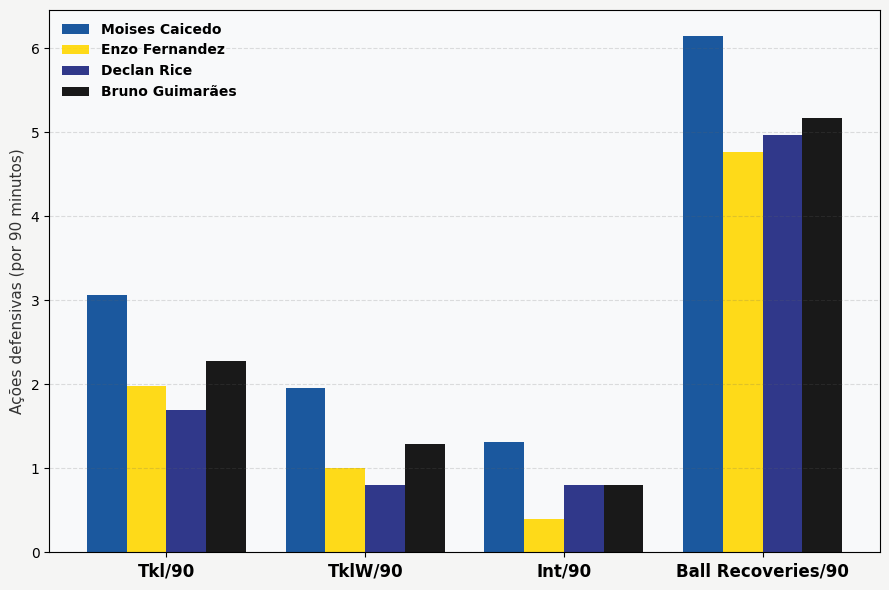

In [74]:
# Métricas defensivas
defense_cols = ['Tkl/90', 'TklW/90', 'Int/90', 'Ball Recoveries/90']

# Cores normalizadas
colors = {k: tuple(np.array(v)/255) for k, v in player_colors.items()}

# Configuração
fig, ax = plt.subplots(figsize=(9, 6))

# Corrige a cor de fundo antes de tudo
fig.patch.set_facecolor('#f5f5f4')   # fundo geral (fora do gráfico)
ax.set_facecolor('#f8f9fa')          # fundo do gráfico (área das barras)

bar_width = 0.2
x = np.arange(len(defense_cols))

# Plotando barras
for i, (_, row) in enumerate(data.iterrows()):
    values = [row[c] for c in defense_cols]
    ax.bar(x + i*bar_width, values, width=bar_width,
           label=row['Player'], color=colors[row['Player']], alpha=0.9)

# Estilo visual
ax.grid(axis='y', alpha=0.2, color='#666', linestyle='--')

# Título e rótulos
# ax.set_title("Radar de Ações Defensivas — Premier League 2024/25",
#              fontsize=17, weight='bold', pad=15, color='#0a0a0a')

ax.set_ylabel("Ações defensivas (por 90 minutos)", fontsize=11, color='#333')
ax.set_xticks(x + bar_width * (len(data) - 1) / 2)
ax.set_xticklabels(defense_cols, fontsize=12, fontweight='bold')

# Legenda
legend = plt.legend(frameon=False, fontsize=10, loc='upper left')
for text in legend.get_texts():
    text.set_fontweight('bold')

# Evita que o tight_layout sobrescreva as cores
plt.tight_layout(rect=[0, 0, 1, 1])
plt.show()

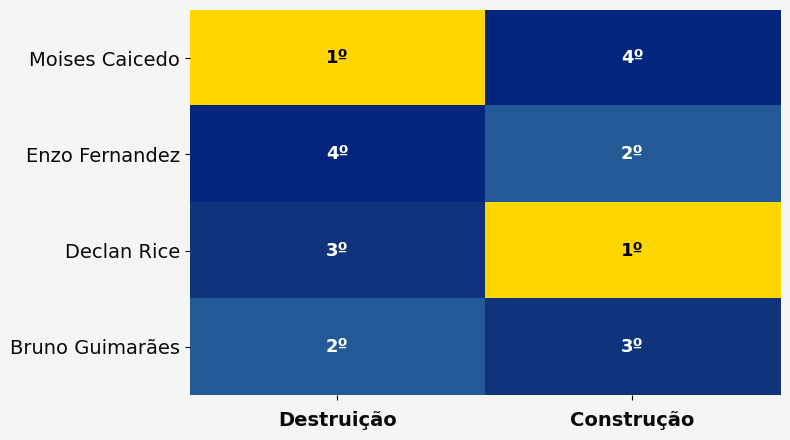

In [76]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

# Scores de qualidade
data['def_score'] = data[['Tkl/90', 'TklW/90', 'Int/90', 'Ball Recoveries/90']].mean(axis=1)
data['build_score'] = data[['PrgC/90', 'PrgP/90', 'TakeOns/90', 'Succ%']].mean(axis=1)
data['rank_def'] = data['def_score'].rank(ascending=False, method='min')
data['rank_build'] = data['build_score'].rank(ascending=False, method='min')
data['rank_overall'] = (data['rank_def'] + data['rank_build']).rank(method='min')

# Ordem (Chelsea em destaque)
order = ['Moises Caicedo', 'Enzo Fernandez'] + \
        [p for p in data['Player'] if p not in ['Moises Caicedo', 'Enzo Fernandez']]
idxd = data.set_index('Player').reindex(order)

# Normalização
def percent_rank(series):
    return 1 - (series - 1) / (len(series) - 1)

vals = np.c_[
    percent_rank(idxd['rank_def']),
    percent_rank(idxd['rank_build'])
]

labels = np.c_[
    idxd['rank_def'].astype(int).astype(str) + 'º',
    idxd['rank_build'].astype(int).astype(str) + 'º'
]

cols = ['Destruição', 'Construção']

# Paleta Chelsea
chelsichiana = LinearSegmentedColormap.from_list(
    "chelsea_royal",
    [
        (0.00, (3/255, 37/255, 126/255)),   # azul real profundo
        (0.40, (19/255, 55/255, 124/255)),  # azul médio
        (0.75, (40/255, 100/255, 160/255)), # azul royal
        (1.00, (255/255, 215/255, 0/255))   # dourado do escudo
    ],
    N=256
)

# Estilo
FS_TICKS = 14
FS_CELLS = 13

fig, ax = plt.subplots(figsize=(8, 4.5))
im = ax.imshow(vals, aspect='auto', cmap=chelsichiana, vmin=0, vmax=1)

# Eixos
ax.set_xticks(range(len(cols)))
ax.set_xticklabels(cols, fontsize=FS_TICKS, fontweight='bold', color='#0a0a0a')
ax.set_yticks(range(len(order)))
ax.set_yticklabels(order, fontsize=FS_TICKS, color='#0a0a0a')

# Contraste automático
for i in range(vals.shape[0]):
    for j in range(vals.shape[1]):
        r, g, b, _ = im.cmap(vals[i, j])
        luminance = 0.299*r + 0.587*g + 0.114*b
        color = 'black' if luminance > 0.6 else 'white'
        ax.text(j, i, labels[i, j], ha='center', va='center',
                fontsize=FS_CELLS, fontweight='bold', color=color)

# Fundo e estética
ax.set_facecolor('#f5f5f4')
fig.patch.set_facecolor('#f5f5f4')
ax.spines[:].set_visible(False)
ax.tick_params(axis='x', pad=8)
ax.grid(False)

plt.tight_layout()
plt.show()